In [1]:
import pandas as pd
import numpy as np

In [2]:
from geoprocessing import Disaster, TweetRaster

In [3]:
raster = TweetRaster(resolution=400000)

In [4]:
raster.load_tweets('data/tweets.csv',
                   longitude_column='lng',
                   latitude_column='lat',
                   crs=4326,
                   filter_before='2014-01-01')

In [5]:
latest_tweet = raster.tweets['created_at'].max()

In [6]:
# raster.geocode_disaster_dataset('data/disasters.csv', longitude_column='Longitude', latitude_column='Latitude')

In [7]:
raster.load_disasters('data/disasters_geocoded.csv',
                      longitude_column='Longitude',
                      latitude_column='Latitude',
                      filter_before='2014-01-01',
                      filter_after=latest_tweet)

In [8]:
raster.select_most_active_pixels(128)

In [9]:
# raster.reset_most_active_pixels()

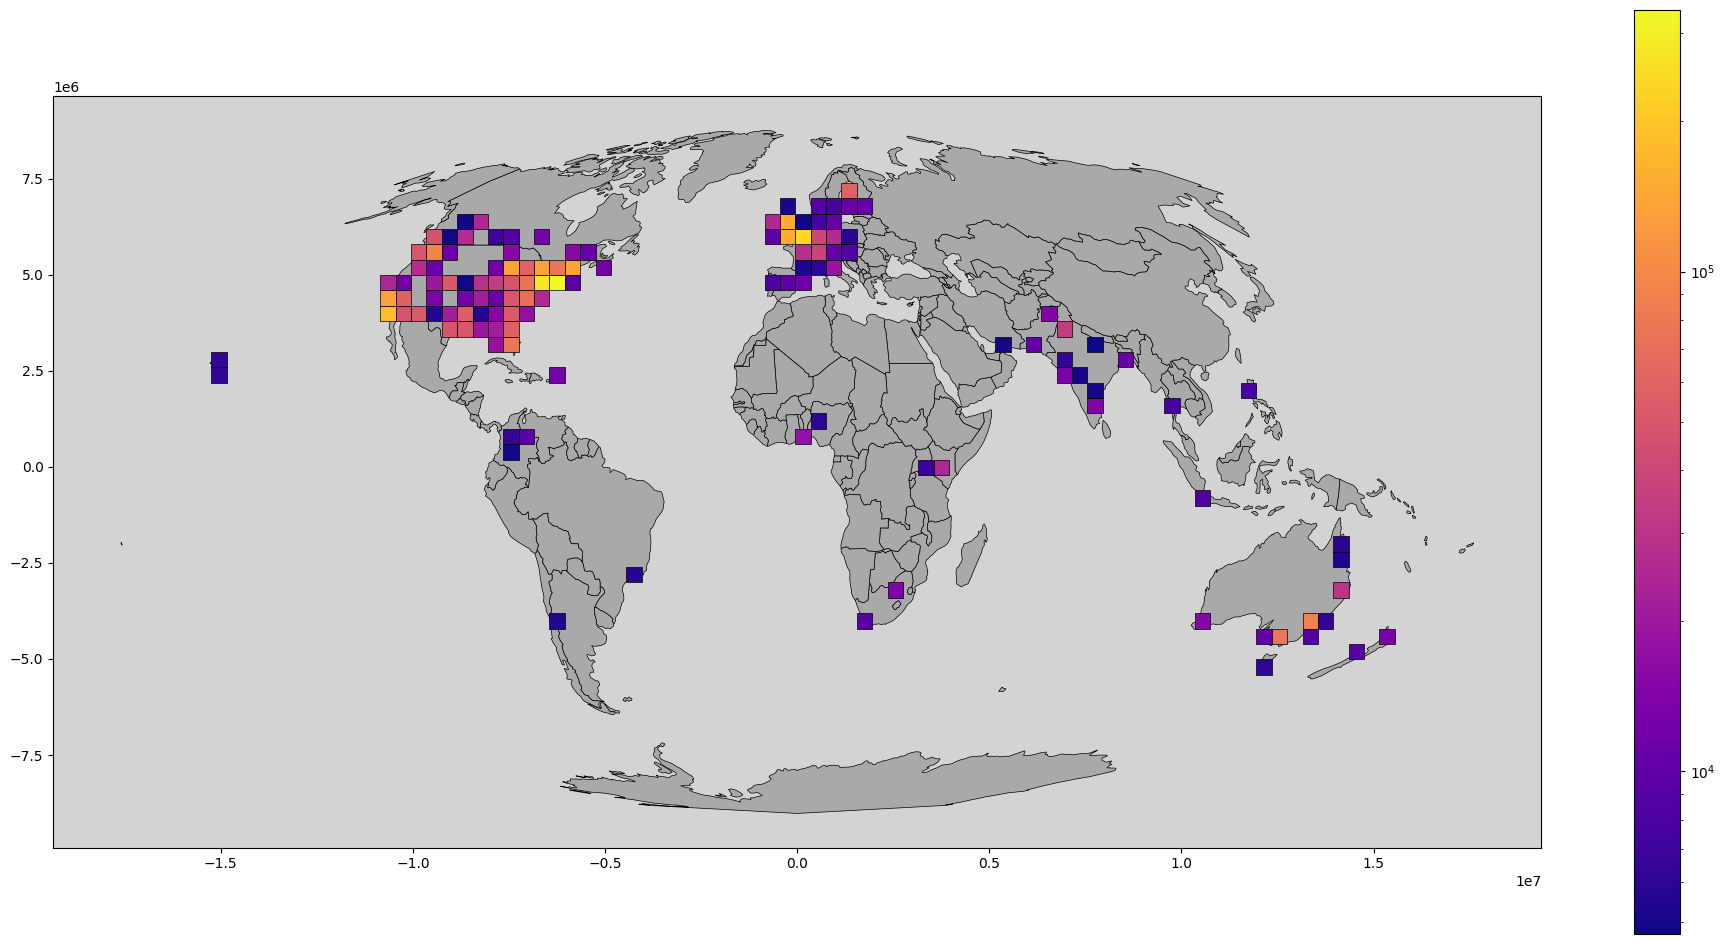

In [10]:
raster.map_counts()

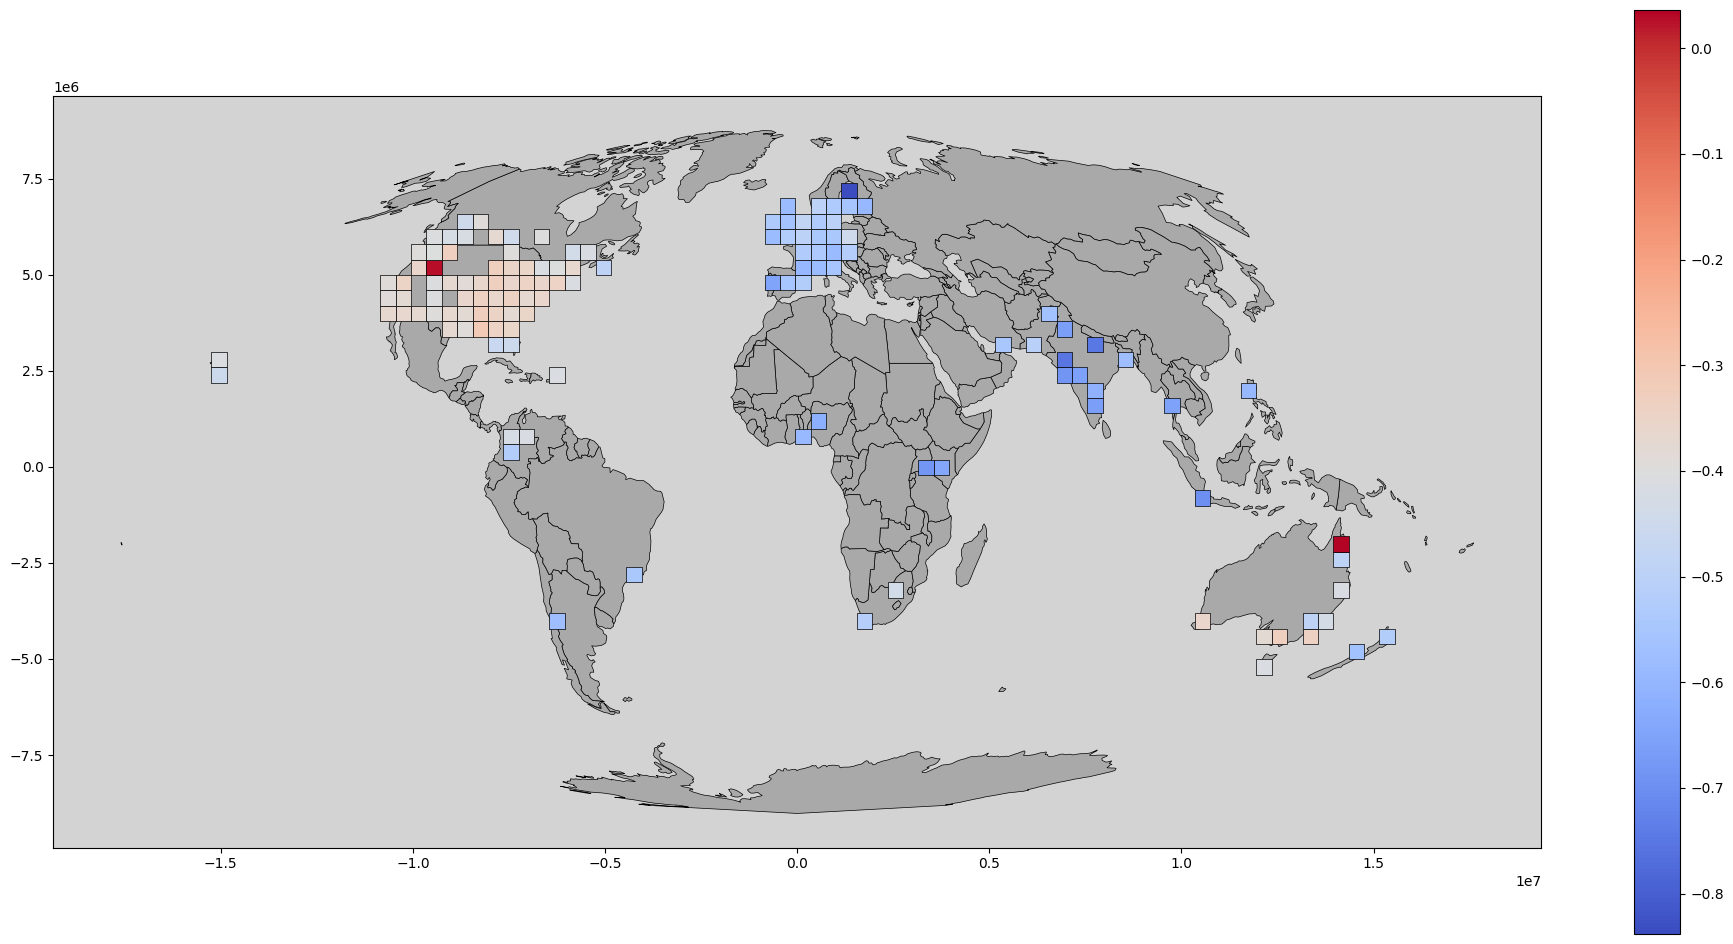

In [11]:
raster.map_means('aggressiveness')

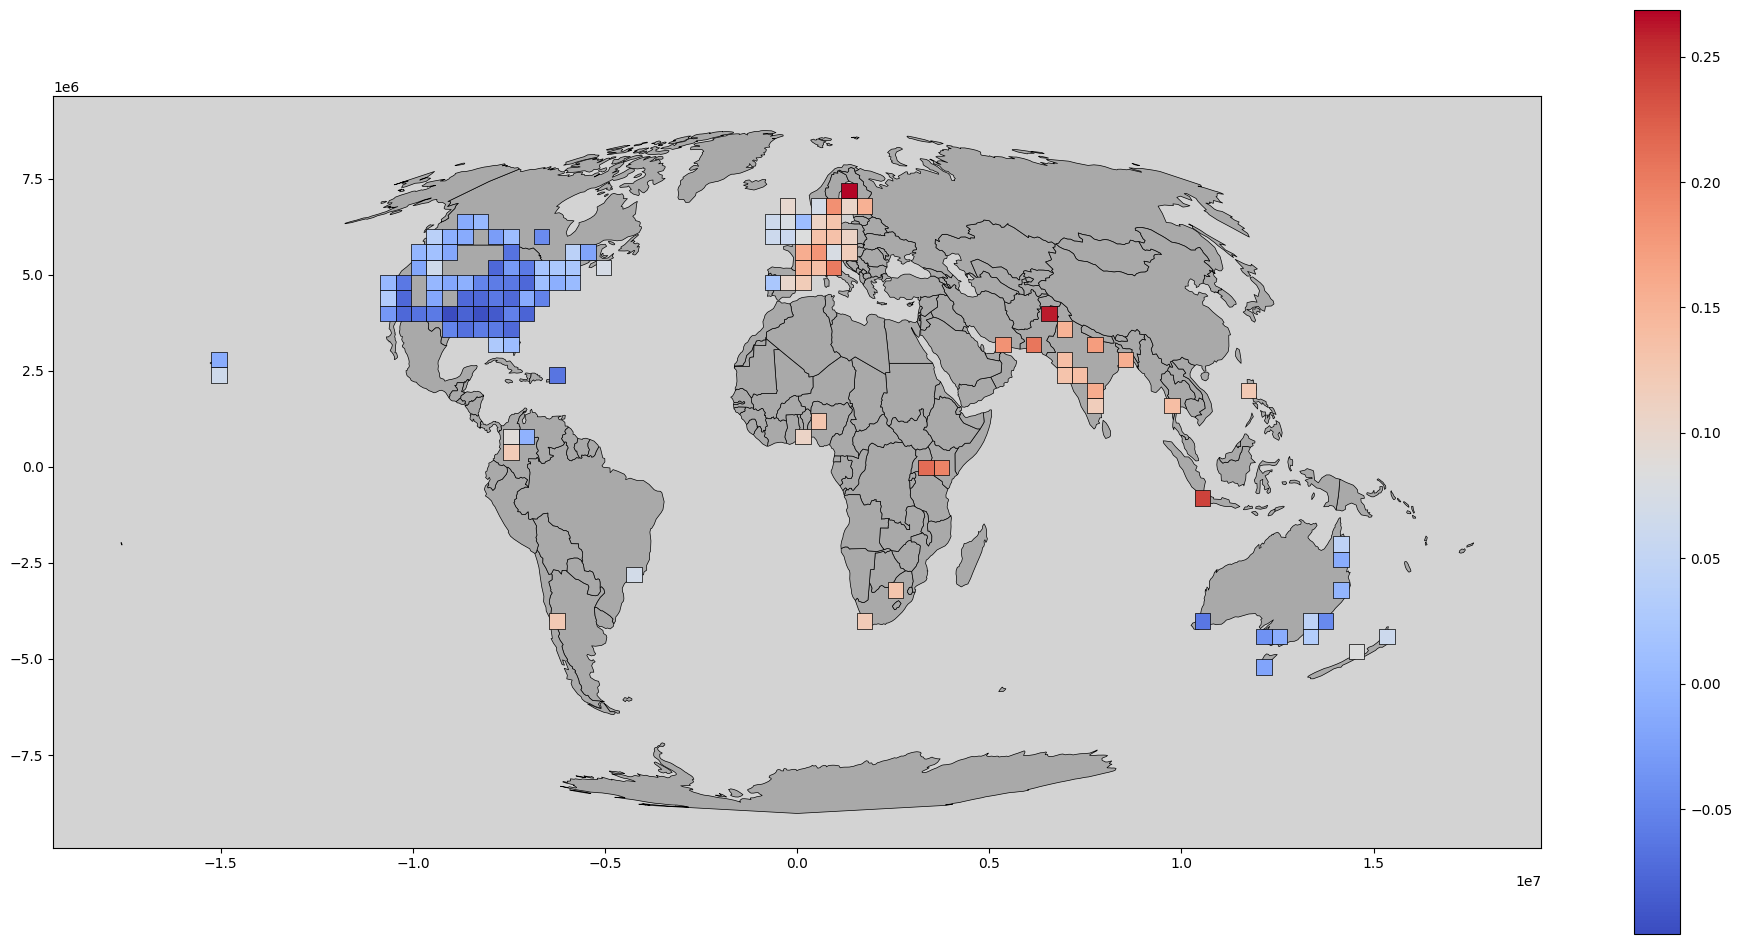

In [12]:
raster.map_means('sentiment')

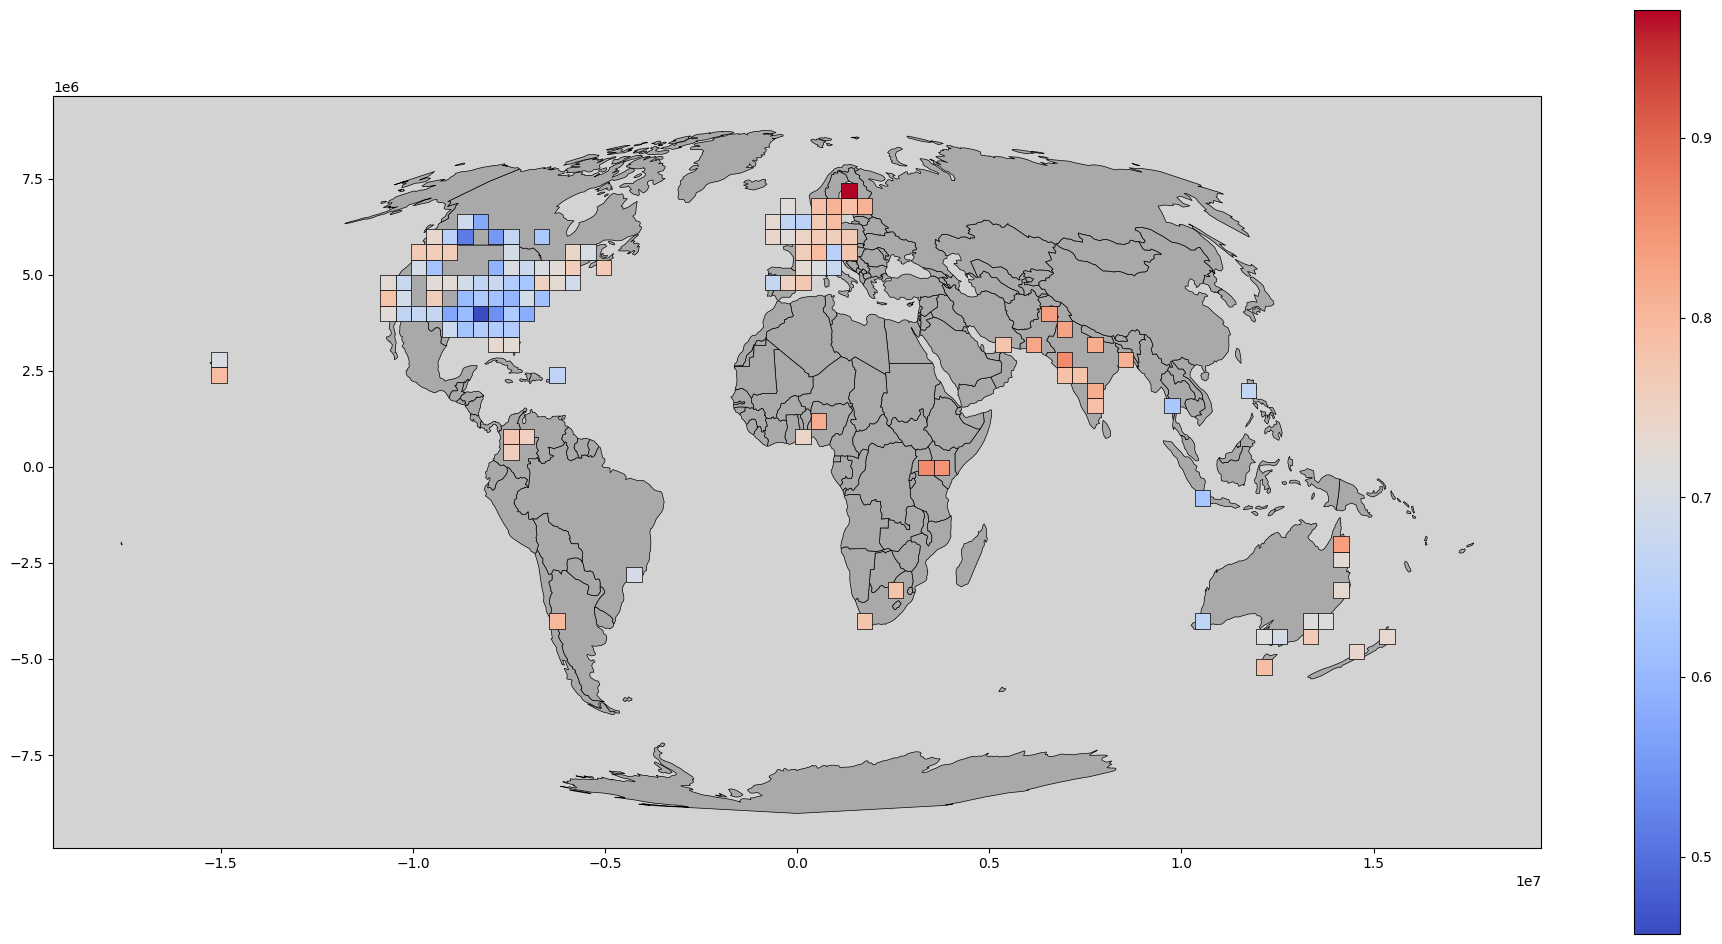

In [13]:
raster.map_means('stance')

Convective storm
United States of America (the)
2016-05-21 00:00:00


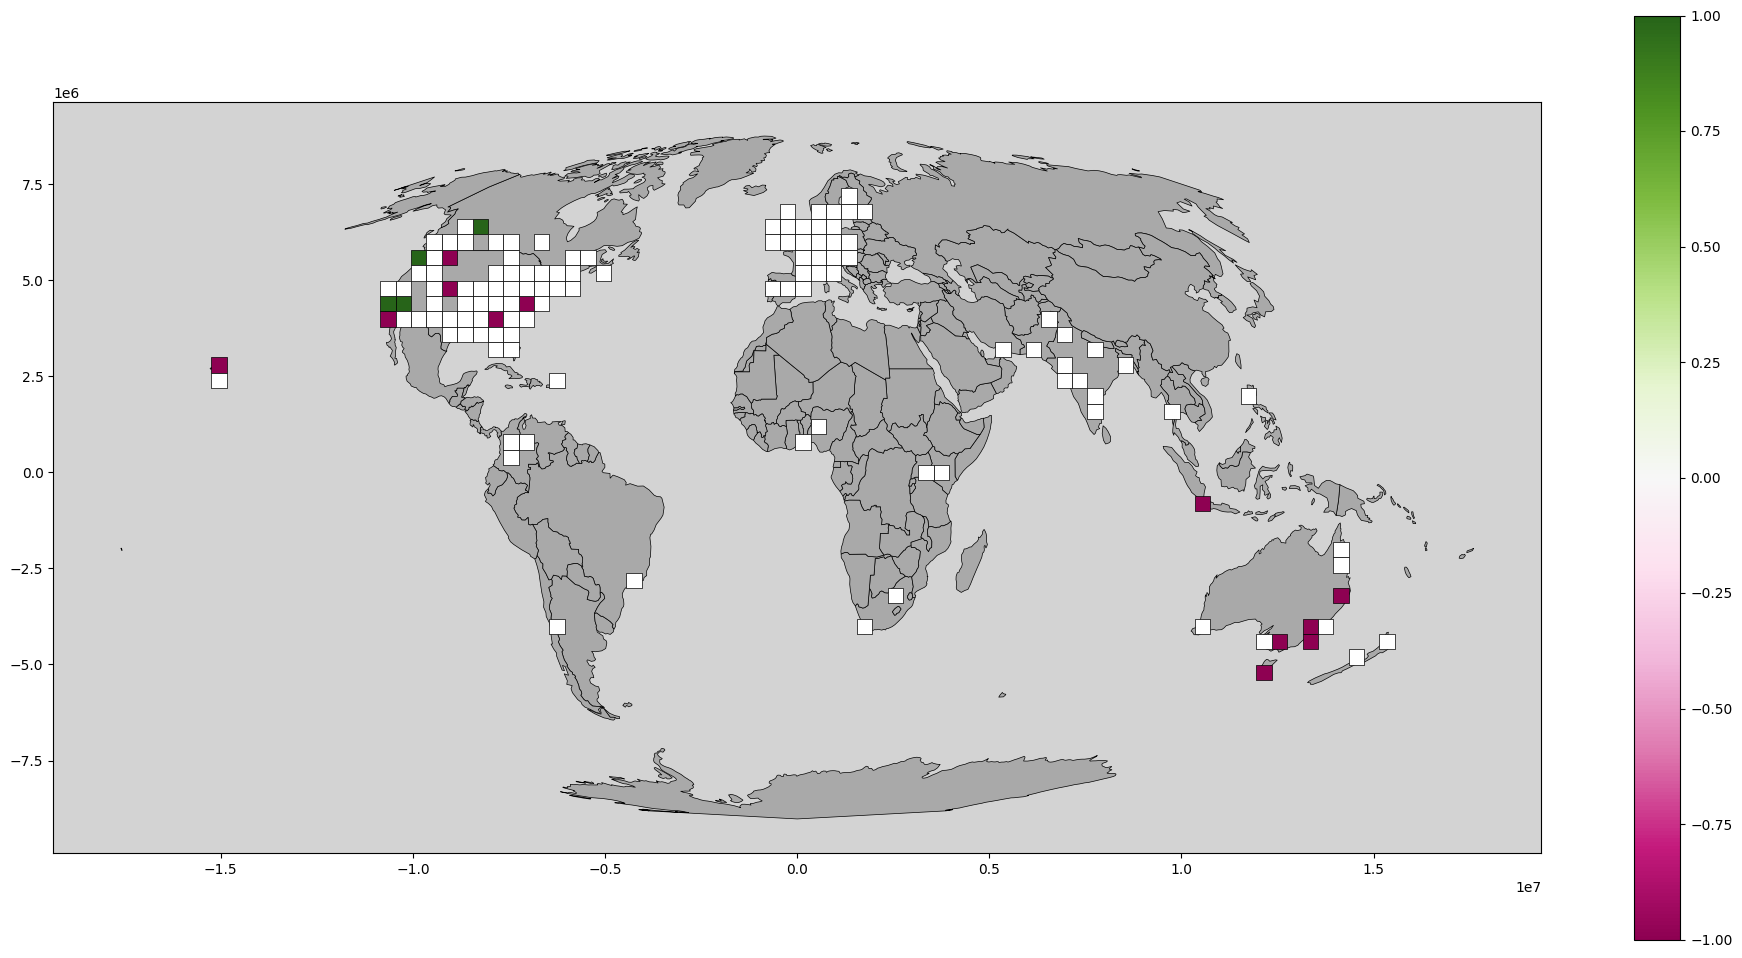

In [14]:
# A sample disaster

d = raster.disasters[777]

print(d.disaster_subtype)
print(d.country)
print(d.start_date)

raster.map_change('stance_change', 28, 7, d)

In [15]:
raster.load_training_data('stance', 28, 28)

In [16]:
# raster.create_training_data('stance', 28, 28)

In [17]:
# raster.write_training_data('stance', 28, 28)

In [18]:
raster.training_data[(28,28)]['stance']['negative_change'].value_counts()

0.0    84515
1.0    11101
Name: negative_change, dtype: int64

In [19]:
raster.training_data[(28,28)]['stance']['no_change'].value_counts()

1.0    70117
0.0    25499
Name: no_change, dtype: int64

In [20]:
raster.training_data[(28,28)]['stance']['positive_change'].value_counts()

0.0    81218
1.0    14398
Name: positive_change, dtype: int64